# ADN_T012. Ligand Protein fingerprints

Authors:

* Adnane Aouidate, 2022, Structural Bioinformatics and Chemoinformatics, Institute of Organic and Analytical Chemistry (ICOA), Orléans, France.

## Aim of this talktorial

# Calculating Interaction Fingerprints with Python and ODDT

In the current tutorial, we will embark on a journey to explore the synergy between Python and the Open Drug Discovery Toolkit (ODDT). Our primary objective is to delve into the realm of cheminformatics and learn how to calculate interaction fingerprints that encapsulate the dynamic interactions between a ligand and a protein.

Interaction fingerprints offer a multidimensional perspective on the binding events occurring at the molecular level. By combining Python's powerful scripting capabilities with the specialized tools offered by ODDT, we'll uncover the intricacies of these interactions and gain insights into molecular recognition.

## Tutorial Highlights

- **Introduction to Interaction Fingerprints**: Gain a clear understanding of what interaction fingerprints are and why they play a crucial role in drug discovery and molecular analysis.

- **Handling Ligand-Protein Complexes**: Learn how to load and prepare ligand-protein complexes for analysis, ensuring that the structures are correctly formatted.

- **Calculating Interaction Fingerprints**: Dive into the core of the tutorial as we explore how to calculate interaction fingerprints using ODDT's intuitive and robust functionalities.

- **Interpreting Results**: Discover how to interpret the interaction fingerprints, understanding the significance of different interaction types and their contribution to binding.

- **Visualization and Analysis**: Harness the power of Python's data visualization tools to create insightful visual representations of the interaction fingerprints, facilitating easier analysis and communication of results.

## Prerequisites

- Basic knowledge of Python programming.
- Familiarity with fundamental concepts of cheminformatics and molecular biology.

## Let's Get Started!

We're excited to embark on this journey of exploration and discovery. By the end of this tutorial, you'll be equipped with the skills to harness Python and ODDT to calculate interaction fingerprints effectively. So, without further ado, let's dive in and begin our exploration of molecular interactions in the world of drug discovery!

https://oddt.readthedocs.io/en/latest/

https://github.com/oddt/oddt

**Protein-ligand interactions**

Non-covalent interactions between the ligand and the protein pocket or protein-protein interface play a fundamental role in governing ligand binding. This process relies on a combination of electrostatic and shape complementarities, induced adaptation, desolvation processes, and many other factors.

In [15]:
from pathlib import Path
import pandas as pd
import oddt
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from oddt import interactions
#import oddt.pandas as opd

from oddt.fingerprints import PLEC
from oddt.fingerprints import InteractionFingerprint, SimpleInteractionFingerprint

**Prepare protein and ligand for ODDT**

In [11]:
protein = next(oddt.toolkit.readfile('pdb', "./PL/5R82_proteinH.pdb"))
protein.protein = True
#data = oddt.read_sdf('./PL/Dockedligands.sdf')
mols = list(oddt.toolkit.readfile('sdf', './PL/Dockedligands.sdf'))

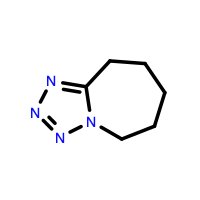

In [25]:
mols[12]

In [22]:
data = pd.DataFrame()
for i,mol in enumerate(mols):
    #Chem.SanitizeMol(mol)
    data.loc[i,'smiles']=Chem.MolToSmiles(mol)
    data.loc[i, "Mol"] = mol

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(Molecule)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)

In [29]:
#IFP = InteractionFingerprint(mols, protein)
#SIFP = SimpleInteractionFingerprint(mols, protein)

In [7]:
IFP

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
data['plec'] = data['mol'].map(lambda x: list(PLEC(x, protein=receptor, 
                                                   size=4092, 
                                                   depth_protein=5,
                                                   depth_ligand=1,
                                                   distance_cutoff=4.5,
                                                   sparse=

In [ ]:
oddt_ligand

In [4]:
#oddt_prot

In [5]:
# Get the protein atom involved in the first H-bond
p_at = prot_atoms[0]
p_at_resname = p_at['resname']
p_at_resnum = p_at['resnum']

In [6]:
# Map back to the atom in the protein object
main_struct_at = oddt_prot.atoms[p_at['id']]

In [10]:
main_struct_at.OBAtom

<openbabel.openbabel.OBAtom; proxy of <Swig Object of type 'OpenBabel::OBAtom *' at 0x7fe3e2881de0> >

In [8]:
# Map back to the atom in the protein object
main_struct_at = oddt_prot.atoms[p_at['id']]
# Get the underlying rdkit Atom object:
main_struct_at_rdk = main_struct_at.Atom
# Get the chain ID and PDB-format atom name
chain_id = main_struct_at_rdk.GetPDBResidueInfo().GetChainId()
atom_name = main_struct_at_rdk.GetPDBResidueInfo().GetName()

AttributeError: 'Atom' object has no attribute 'Atom'

In [13]:
import pandas as pd 
import numpy as np

resis = []
resns = []
chains = []
atomns = []

for p_at in prot_atoms:
    resis.append(p_at['resnum'])
    resns.append(p_at['resname'])
    # Map back to the atom in the protein object
    main_struct_at = oddt_prot.atoms[p_at['id']]
    # Get the underlying rdkit Atom object:
    main_struct_at_rdk = main_struct_at.Atom
    # Get the chain ID and PDB-format atom name
    chains.append(main_struct_at_rdk.GetPDBResidueInfo().GetChainId())
    atomns.append(main_struct_at_rdk.GetPDBResidueInfo().GetName())

colnames = ['residue_number', 'residue_name', 'chain', 'atom']
prot_df = pd.DataFrame(data=np.array([resis, resns, chains, atomns]).T, columns = colnames)
prot_df

AttributeError: 'Atom' object has no attribute 'Atom'